In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PCA

In [7]:
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()

In [12]:
x = iris.data
y = iris.target

In [13]:
from sklearn.decomposition import PCA

### step 1. 開PCA機(壓縮到只有2項)

In [14]:
pca = PCA(n_components=2)

### step 2. 訓練

In [15]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### step 3. 預測

In [16]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [17]:
X = pca.transform(x)

In [18]:
X[87]

array([ 0.81509524, -0.37203706])

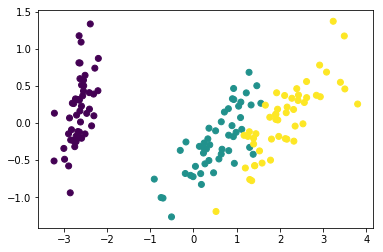

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)

### 準備訓練/測試資料

In [20]:
from sklearn.model_selection import train_test_split

#### train_test_split(X,y,test_size=0.2,random_state=0):輸入X輸出y測試資料20%

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### step 1. 開SVC函數學習機

In [23]:
from sklearn.svm import SVC

In [25]:
clf = SVC(gamma='auto')

### step 2. 訓練

In [27]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### step 3. 預測

In [30]:
y_predict = clf.predict(x_test)

In [31]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

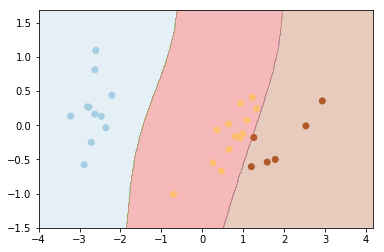

In [33]:
x0 = np.arange(-4,4.2,0.02)
y0 = np.arange(-1.5,1.7,0.02)

xm ,ym = np.meshgrid(x0,y0)
#將x,y合併成一個x對應到一個y
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape) 
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')

# K-means 自動分類

In [34]:
x = np.random.rand(100,2)

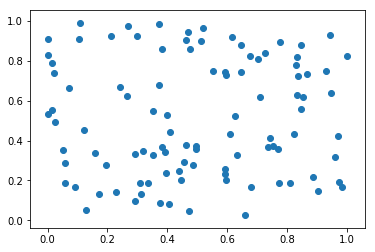

In [36]:
plt.scatter(x[:,0],x[:,1])

### step 1. 搭開K-means學習機

In [37]:
from sklearn.cluster import KMeans

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [39]:
clf = KMeans(n_clusters=3)

### step 2. 學習

In [40]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### step 3. 預測

In [41]:
clf.predict(x)

array([0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2])

In [43]:
clf.labels_

array([0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2])

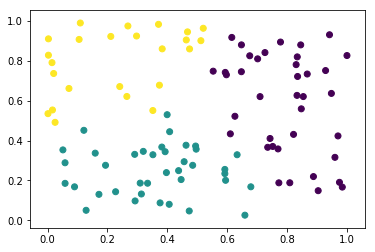

In [44]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

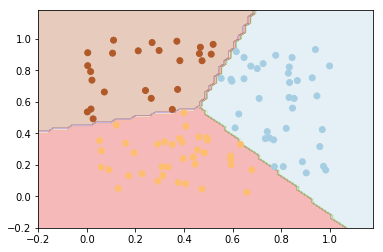

In [47]:
x0 = y0 = np.arange(-0.2,1.2,0.02)
xm,ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

## `make_blobs` 生更像真實世界的數據

In [48]:
from sklearn.datasets.samples_generator import make_blobs

#### make_blobs(n_samples=產出sample數量,centers=分類數,n_features,random_state=0表示不隨機以防每次生成皆不一樣)

In [51]:
x,y = make_blobs(n_samples=500,centers=3,n_features=2,random_state=0)

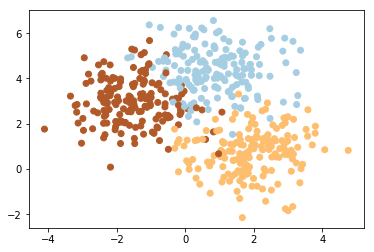

In [52]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

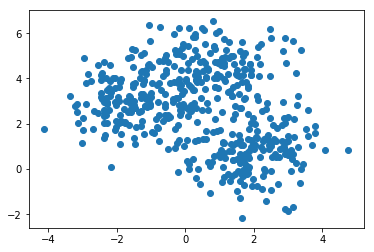

In [54]:
plt.scatter(x[:,0],x[:,1])

### step 1. 打開K-means學習機

In [55]:
clf = KMeans(n_clusters=3)

### step 2. 訓練

In [56]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### step 3. 預測

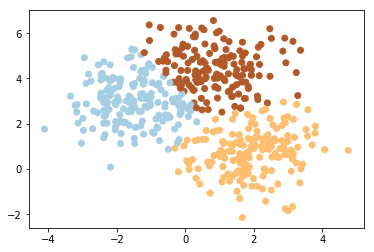

In [57]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

# Mean-Shifts自動分類

### step 1. 打開函數學習機

In [59]:
from sklearn.cluster import MeanShift

#### MeanShift(bandwidth=分群多少,數值越大分群越少)

In [68]:
clf = MeanShift(bandwidth=0.7)

### step 2. 訓練

In [69]:
clf.fit(x)

MeanShift(bandwidth=0.7, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

### step 3. 預測

In [70]:
clf.labels_

array([ 4,  9,  2, 11,  7,  4,  6,  7,  2, 10,  9,  9,  2, 12,  7,  3, 21,
       18,  5,  3, 11, 14,  0,  9, 10, 12, 14,  5,  3,  5, 12, 18,  8,  7,
        1, 16,  0,  0,  1, 16,  2,  4, 20, 13, 22, 17,  1, 18,  2,  2,  3,
       10,  8,  3,  9,  2, 23,  1,  4, 16, 22,  6,  1, 14, 11, 25,  1,  1,
        6,  3,  5,  8, 17,  9, 22,  7,  0,  1,  1, 20, 18,  8,  2,  3,  9,
        0,  2, 12, 12,  2,  6,  4, 22,  7,  6,  0, 12,  6,  6,  3, 22,  2,
       25,  3, 17, 14,  4, 13,  4,  1,  8,  3, 14,  6,  2, 14,  7,  0,  1,
       12,  2, 13,  6,  9,  2, 10,  2,  4, 12,  8,  1, 10,  9,  1,  7,  0,
        2,  9, 15,  3, 18,  8,  9, 21, 11,  3,  3, 21, 11, 17,  0,  3, 19,
        4, 13,  8,  6, 16,  5, 15,  0, 15,  2, 12,  2,  0,  3,  0,  7,  0,
        7,  9,  0,  4,  4,  7,  2,  1,  1, 23,  0,  1,  2, 24,  1, 11,  4,
       13,  6,  9,  2,  3,  1, 22,  3,  9,  1,  7,  5, 14,  7, 22, 10,  8,
        9, 14, 14, 16,  9,  2,  4, 14, 14,  2,  5,  4,  2, 18,  2, 12,  0,
       19, 11, 23, 20, 18

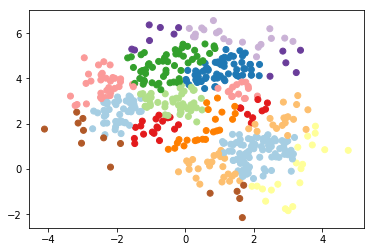

In [71]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

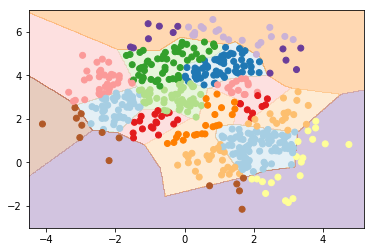

In [72]:
#畫出x,y的範圍
x0 = np.arange(-4.5,5.2,0.02)
y0 = np.arange(-3,7,0.02)

xm,ym = np.meshgrid(x0,y0)
#將各點蒐集起來
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

## `cross_val_score`

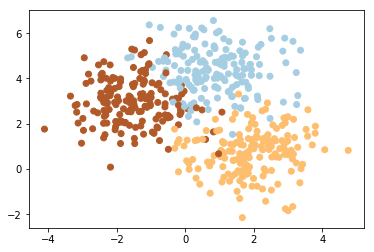

In [73]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
clf = SVC(gamma='auto')

In [77]:
scores = cross_val_score(clf,x,y,cv=5)

In [78]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [79]:
scores.max()

0.98989898989899

In [80]:
scores.mean()

0.9420106716554008

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
clf = DecisionTreeClassifier()

In [83]:
scores = cross_val_score(clf,x,y,cv=5)

In [84]:
scores

array([0.93137255, 0.89108911, 0.94949495, 0.91919192, 0.86868687])

In [85]:
scores.max()

0.9494949494949495

In [86]:
scores.mean()

0.9119670790608472

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [89]:
clf = RandomForestClassifier(n_estimators=100)

In [94]:
#cv:Cross validation交叉驗證(將樣本切割成多個小子集的做測試與訓練)
scores = cross_val_score(clf,x,y,cv=5)

In [91]:
scores

array([0.92156863, 0.93069307, 0.96969697, 0.88888889, 0.88888889])

In [92]:
scores.mean()

0.9199472888465318

In [93]:
scores.max()

0.9696969696969697